# Multilayer Perceptron (MLP)

A Multilayer Perceptron (MLP) is one of the simplest types of feedforward neural networks. It consists of an input layer, one or more hidden layers, and an output layer.

- **Input Layer**: Receives the input features.
- **Hidden Layers**: Perform transformations on the input through learned weights and activation functions (such as ReLU).
- **Output Layer**: Produces the final predictions (e.g., classification scores).

Each layer is fully connected to the next layer, meaning every neuron in one layer connects to every neuron in the next.

An MLP learns by minimizing a loss function (such as cross-entropy for classification) using an optimization algorithm like stochastic gradient descent (SGD) or Adam. The learning process involves two main steps:
- **Forward Pass**: Calculate outputs layer by layer.
- **Backward Pass**: Compute gradients and update weights using backpropagation.

Although simple, MLPs are powerful for learning complex patterns when the data is not highly structured (e.g., tabular data, simple 2D data).

In this project, we build a basic MLP for binary classification tasks using PyTorch.


In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.5.1
False


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [3]:
# 1. 准备数据（生成简单二分类数据）
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 转换成PyTorch张量
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

print("X shape:", X.shape)  # (1000, 2)，1000个样本，每个样本2个特征
print("y shape:", y.shape)  # (1000)，每个样本对应一个标签（0或1）

X shape: torch.Size([1000, 2])
y shape: torch.Size([1000])


In [4]:
print(y[:20])

tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])


In [5]:
# 2. 定义一个简单的 MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # 输入2维，隐藏层16维
        self.fc2 = nn.Linear(16, 2)  # 隐藏层16维，输出2维（二分类）

    def forward(self, x):
        x = self.fc1(x)
        print("After fc1, x shape:", x.shape)
        x = torch.relu(x)
        x = self.fc2(x)
        print("After fc2, x shape:", x.shape)
        return x

# 实例化模型
model = SimpleMLP()

# 打印模型结构
print(model)

SimpleMLP(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=2, bias=True)
)


In [6]:
# 3. 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 分类用交叉熵
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [7]:
# 4. 训练模型
epochs = 5  # 只跑5轮，快速看结果
for epoch in range(epochs):
    outputs = model(X)  # forward过程
    print("Model raw outputs shape:", outputs.shape)  # 应该是 (1000, 2)

    loss = criterion(outputs, y)  # 计算损失
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f}")

    optimizer.zero_grad()  # 梯度归零
    loss.backward()        # 反向传播，计算梯度
    optimizer.step()       # 更新参数

print("Training complete!")

After fc1, x shape: torch.Size([1000, 16])
After fc2, x shape: torch.Size([1000, 2])
Model raw outputs shape: torch.Size([1000, 2])
Epoch [1/5] Loss: 0.7573
After fc1, x shape: torch.Size([1000, 16])
After fc2, x shape: torch.Size([1000, 2])
Model raw outputs shape: torch.Size([1000, 2])
Epoch [2/5] Loss: 0.7247
After fc1, x shape: torch.Size([1000, 16])
After fc2, x shape: torch.Size([1000, 2])
Model raw outputs shape: torch.Size([1000, 2])
Epoch [3/5] Loss: 0.6943
After fc1, x shape: torch.Size([1000, 16])
After fc2, x shape: torch.Size([1000, 2])
Model raw outputs shape: torch.Size([1000, 2])
Epoch [4/5] Loss: 0.6661
After fc1, x shape: torch.Size([1000, 16])
After fc2, x shape: torch.Size([1000, 2])
Model raw outputs shape: torch.Size([1000, 2])
Epoch [5/5] Loss: 0.6397
Training complete!


After fc1, x shape: torch.Size([10000, 16])
After fc2, x shape: torch.Size([10000, 2])


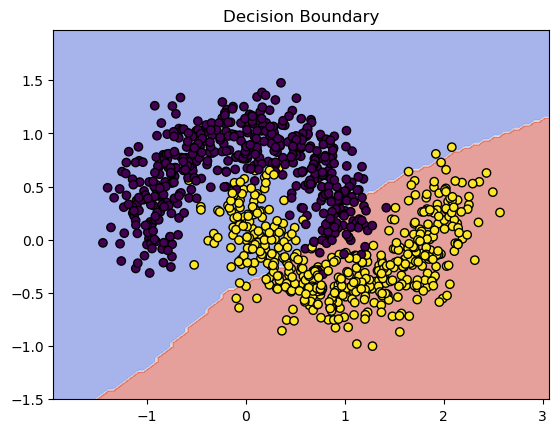

In [8]:
# 5. 可视化决策边界
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = torch.meshgrid(
        torch.linspace(x_min, x_max, 100),
        torch.linspace(y_min, y_max, 100),
        indexing='xy'
    )

    grid = torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)
    with torch.no_grad():
        preds = model(grid)
        preds = preds.argmax(dim=1).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, model)

In [9]:
# train model function
def train_model(model, X, y, criterion, optimizer, epochs=5):
    """
    Train a PyTorch model.

    Args:
        model: The neural network to train.
        X: Input features (torch tensor).
        y: Labels (torch tensor).
        criterion: Loss function (e.g., CrossEntropyLoss()).
        optimizer: Optimizer (e.g., Adam, SGD).
        epochs: Number of training epochs.
    """
    for epoch in range(epochs):
        model.train()  # 切换到训练模式（虽然MLP影响不大，但养成好习惯）
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 1 == 0:  # 每一轮都打印一下loss
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    print("Training complete!")
